In [174]:
import numpy as np
import matplotlib.pyplot as plt

from QlernNN_WangJingyan.approximator import *
from QlernNN_WangJingyan.q_learning_nn import *

from virl import virl

In [175]:

env = virl.Epidemic(problem_id=4, stochastic=False, noisy=False)

d_states = env.observation_space.shape[0]
n_actions = env.action_space.n
nn_config = [36, 36]

nn_approximator =  NNFunctionApproximatorJointKeras(0.0, d_states, n_actions, nn_config)
nn_approximator.model.load_weights("./QlernNN_WangJingyan/data/approximator_training/cartpole04.h5")

In [176]:
states = []
rewards1 = []
actions = []
done = False


s = env.reset()
states.append(s)
while not done:
    a = np.argmax(nn_approximator.predict(np.reshape(s,(1, len(s)))))
    s, r, done, i = env.step(a)
    states.append(s)
    rewards1.append(r)
    actions.append(a)


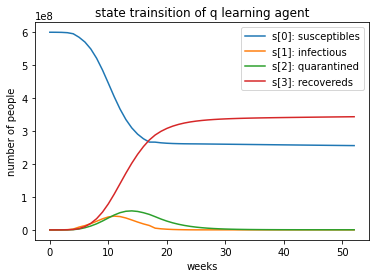

In [177]:
d = list(zip(*states))

labels = ['s[0]: susceptibles', 's[1]: infectious', 's[2]: quarantined', 's[3]: recovereds']

for i in range(0, 4):
    plt.plot(d[i], label=labels[i])

plt.xlabel("weeks")
plt.ylabel("number of people")
plt.title("state trainsition of q learning agent")
plt.legend()

Text(0, 0.5, 'rewards')

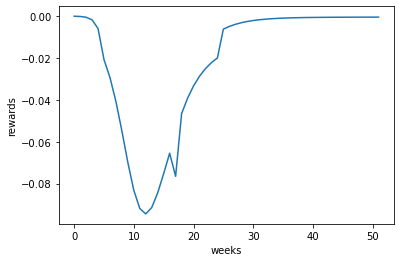

In [178]:
plt.plot(rewards1)
plt.xlabel("weeks")
plt.ylabel("rewards")

In [179]:
states = []
rewards2 = []
actions = []
done = False


s = env.reset()
states.append(s)
while not done:
    a = np.argmax(np.random.choice(4))
    s, r, done, i = env.step(a)
    states.append(s)
    rewards2.append(r)
    actions.append(a)

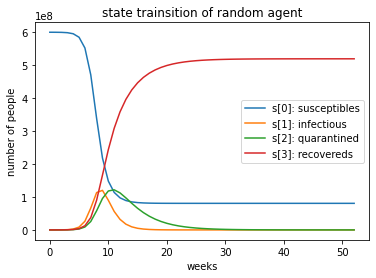

In [180]:
d = list(zip(*states))

labels = ['s[0]: susceptibles', 's[1]: infectious', 's[2]: quarantined', 's[3]: recovereds']

for i in range(0, 4):
    plt.plot(d[i], label=labels[i])

plt.xlabel("weeks")
plt.ylabel("number of people")
plt.title("state trainsition of random agent")
plt.legend()

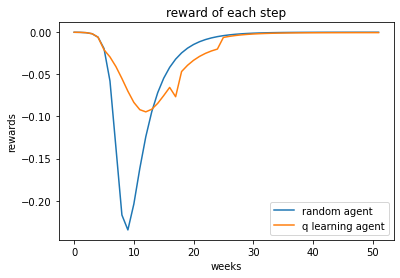

In [183]:

plt.plot(rewards2, label="random agent")
plt.plot(rewards1, label="q learning agent")
plt.xlabel("weeks")
plt.ylabel("rewards")
plt.title("reward of each step")
plt.legend()